<a href="https://colab.research.google.com/github/AadiSharmaa/Apna-College-clone/blob/main/Google_Play_Store_Apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

Step 2: Load dataset

In [3]:
df = pd.read_csv('googleplaystore.csv')

Step 3: Basic Data Exploration

In [4]:
print("First 5 rows of the dataset:")
print(df.head(), "\n")

print("Dataframe info:")
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()
print(info_str)

print("📊 Summary Statistics (describe):")
print(df.describe(include='all'))

First 5 rows of the dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.

Step 4: Data Cleaning

In [5]:
print(df.isnull().sum())

df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

df.dropna(subset=['Type','Content Rating','Current Ver','Android Ver'], inplace=True)

# Reviews to int
df['Reviews'] = df['Reviews'].astype(int)

# Installs: remove ',' and '+' then convert to int
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True).astype(int)

# Price: remove '$' and convert to float
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False).astype(float)

# Size: handle 'M', 'k', and 'Varies with device'
import numpy as np

def convert_size(value):
    if isinstance(value, str):
        if 'M' in value:
            return float(value.replace('M', ''))
        elif 'k' in value:
            return float(value.replace('k', '')) / 1024
    return np.nan  # For 'Varies with device' or non-string values

df['Size'] = df['Size'].astype(str).replace('Varies with device', np.nan)
df['Size'] = df['Size'].apply(convert_size)

# Last Updated to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


Step 5: Merging both datasets

In [6]:
import pandas as pd

df_apps = pd.read_csv("googleplaystore.csv")
df_reviews = pd.read_csv("googleplaystore_user_reviews.csv")

# Merge them on the 'App' column
df_merged = pd.merge(df_apps, df_reviews, on='App', how='inner')

Step 5.1: Data Visualization

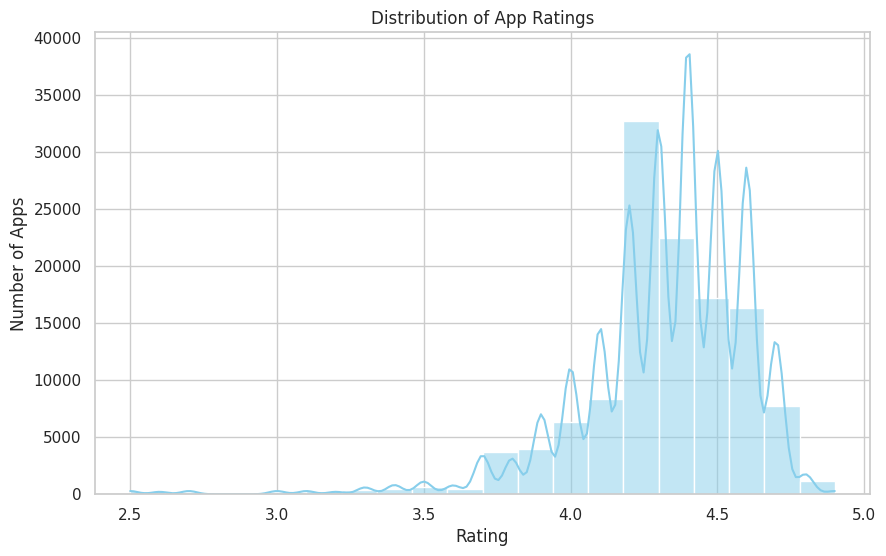

/tmp/ipython-input-7-1194720889.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


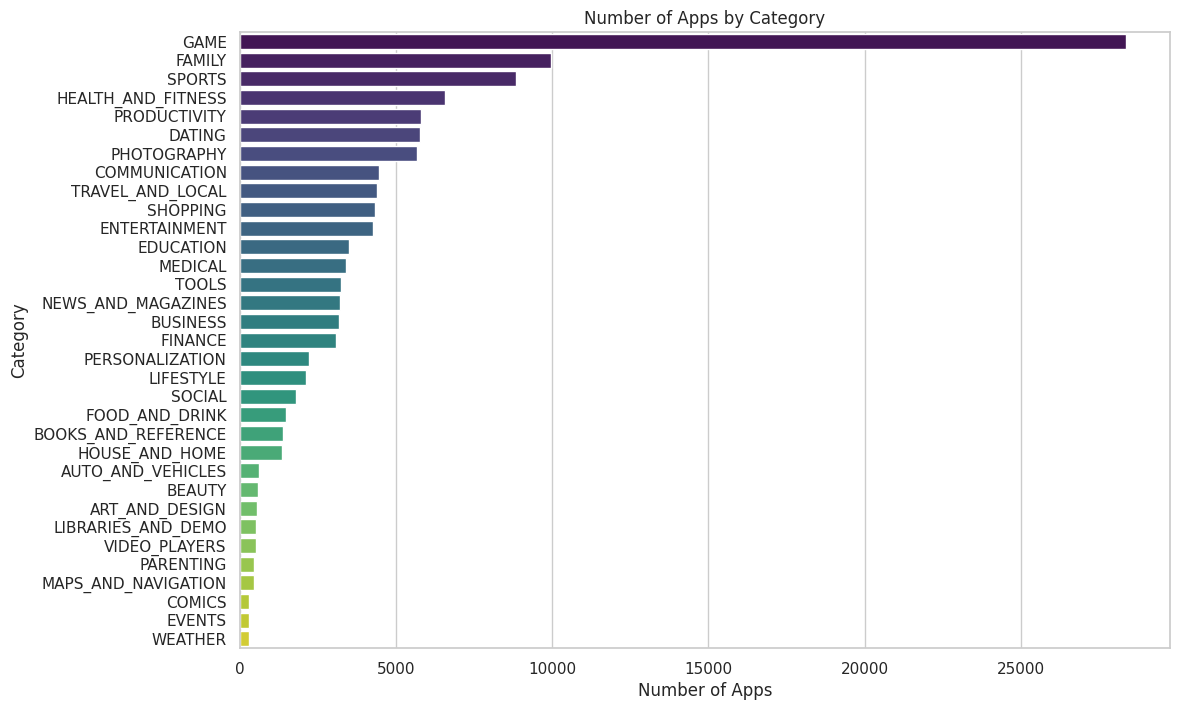

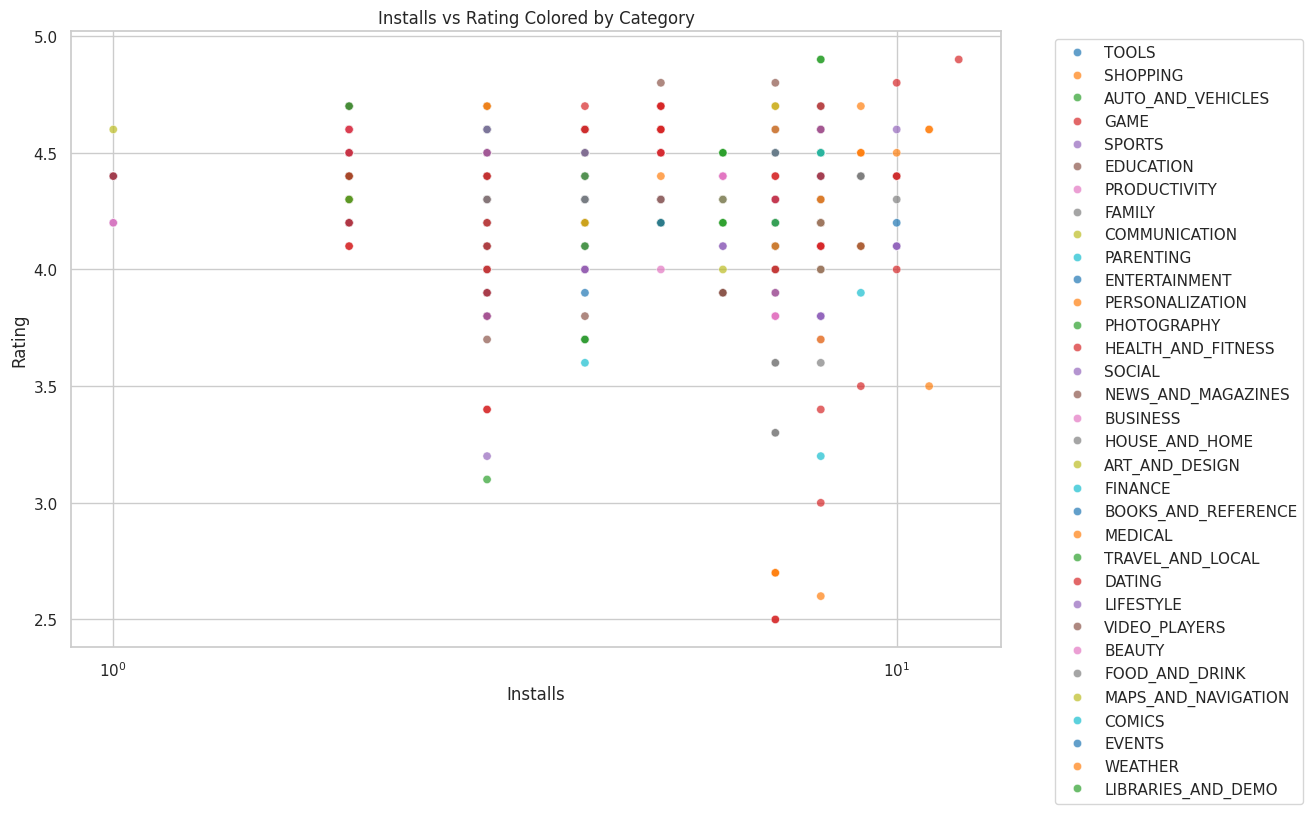

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# 1. Histogram of App Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()

# 2. Bar Chart: Count of Apps by Category
plt.figure(figsize=(12, 8))
category_counts = df_merged['Category'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Number of Apps by Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

# 3. Scatter Plot: Installs vs Rating, Colored by Category
plt.figure(figsize=(12, 8))
sample_df = df_merged.sample(n=1000, random_state=1)  # sample for readability
sns.scatterplot(data=sample_df, x='Installs', y='Rating', hue='Category', palette='tab10', alpha=0.7)
plt.title('Installs vs Rating Colored by Category')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xscale('log')  # Use log scale for install range
plt.show()

Ques 1. Which category has the highest number of apps ?

In [8]:
df['Category'].value_counts().head(5)

,count
Category,
FAMILY,1968
GAME,1144
TOOLS,841
MEDICAL,463
BUSINESS,460


Ques 2. Which category has the highest number of installs ?

In [9]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(5)

,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452271905


Ques 3. Which category has the highest number of reviews?

In [10]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(5)

,Reviews
Category,
GAME,1585422349
COMMUNICATION,815462260
SOCIAL,621241422
FAMILY,410226107
TOOLS,273181033


Ques 4. WHich category has the highest rating?

In [11]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(5)

,Rating
Category,
EDUCATION,4.387778
ART_AND_DESIGN,4.368438
EVENTS,4.363647
BOOKS_AND_REFERENCE,4.311537
PERSONALIZATION,4.306873
